# import All necessary Libraries

In [151]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 'utf-8' codec can't decode byte 0xe1 in position 76763: invalid continuation byte(for access utif 8 code used in [encoding="latin-1"])

In [72]:
df_movie=pd.read_csv('IMDb Movies India.csv',encoding='latin-1')


df_movie

# check the top 10 data

In [45]:
df_movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# check the columns

In [15]:
df_movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# to get statics about the dataFrame 

In [20]:
df_movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [21]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [24]:
df_movie.shape

(15509, 10)

# count total rating  

In [34]:
df_movie['Rating'].value_counts()

Rating
6.8     200
6.5     192
6.2     190
6.6     163
7.1     163
       ... 
2.0       2
9.7       1
10.0      1
1.4       1
1.1       1
Name: count, Length: 83, dtype: int64

# check the null value

In [4]:
df_movie[['Rating','Genre','Director']].isnull().sum()

Rating      7590
Genre       1877
Director     525
dtype: int64

# check how many same sapce in three coplumn

In [5]:
rows_to_drop=df_movie[df_movie[['Rating', 'Genre', 'Director']].isnull().all(axis=1)]
rows_to_drop.shape

(24, 10)

# Drop Space column

In [14]:
df_cleaned = df_movie.drop(rows_to_drop.index)
df_cleaned


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_cleaned[df_cleaned[['Rating', 'Genre', 'Director']].isnull().all(axis=1)]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


In [16]:
df_movie.shape

(15509, 10)

In [18]:
df_cleaned.shape

(15485, 10)

In [8]:
df_movie.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid


# Delete the all null values

In [30]:
df_movie=df_movie.dropna()

# check th all null value

In [31]:
df_movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [18]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24950 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      24950 non-null  object 
 1   Year      24204 non-null  object 
 2   Duration  14168 non-null  object 
 3   Genre     24950 non-null  object 
 4   Rating    15837 non-null  float64
 5   Votes     15838 non-null  object 
 6   Director  24408 non-null  object 
 7   Actor 1   23167 non-null  object 
 8   Actor 2   22277 non-null  object 
 9   Actor 3   21425 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.1+ MB


In [21]:
# sns.countplot(x=df_movie['Year'],hue=df_movie['Rating'])
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Homecoming,(2021),90 min,Musical,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [22]:
df_movie.isnull().sum()

Name            0
Year          746
Duration    10782
Genre           0
Rating       9113
Votes        9112
Director      542
Actor 1      1783
Actor 2      2673
Actor 3      3525
dtype: int64

In [25]:
df_movie.dropna(inplace=True)

In [26]:
df_movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [28]:
df_movie.shape

(12008, 10)

# check the duplicated data 

In [29]:
df_movie=df_movie.duplicated().any()
print(df_movie)

False


# derop duplicates functions using drop_duplicates() 
df_movie=df_movie.drop_duplicates()

# value_counts of Gerner

In [79]:
 df_movie=df_movie['Genre'].value_counts()


In [85]:
df_movie

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

# Exploratory Data Analysis (EDA)

In [91]:
df_movie

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

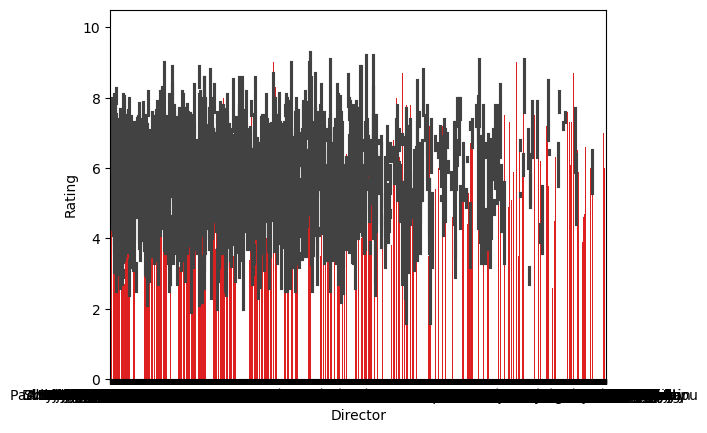

In [120]:
# custom_colors = ["#ff9999", "#66b3ff"]
# , "#99ff99", "#ffcc99"

sns.barplot(x='Director',y='Rating', data=df_movie ,color="red")

plt.show()

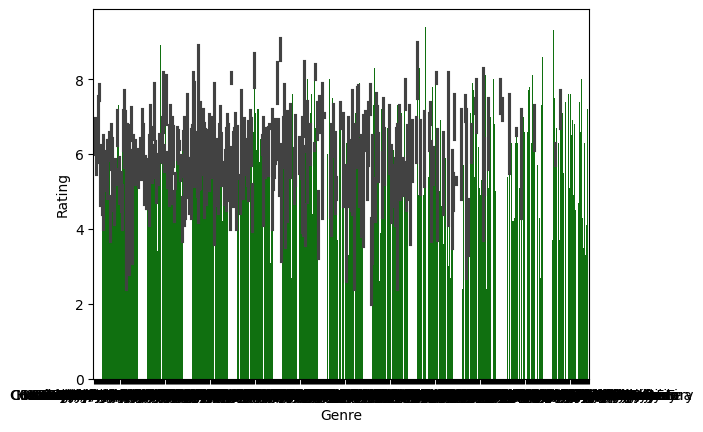

In [123]:
sns.barplot(x='Genre',y='Rating', data=df_movie ,color="green")

plt.show()

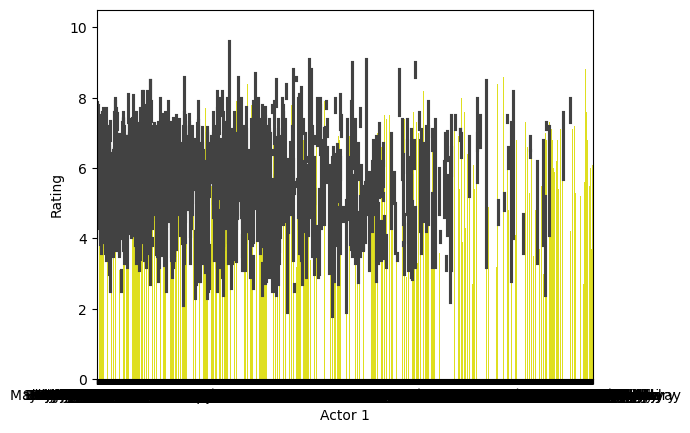

In [124]:
sns.barplot(x='Actor 1',y='Rating', data=df_movie ,color="yellow")

plt.show()

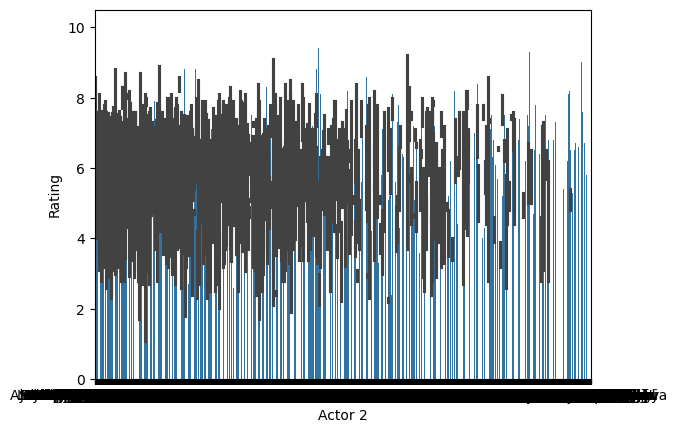

In [125]:
sns.barplot(x='Actor 2',y='Rating', data=df_movie )

plt.show()

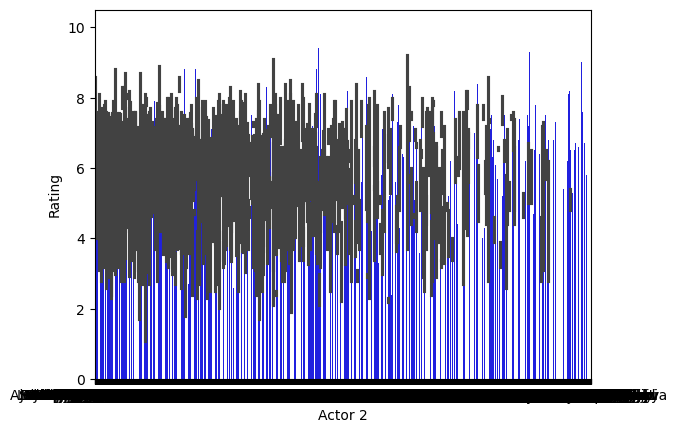

In [126]:
sns.barplot(x='Actor 2',y='Rating', data=df_movie ,color="blue")

plt.show()

# Genre-wise Average Rating

In [136]:
genre_rating = df_movie.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
print(genre_rating)

Genre
History, Romance                 9.4
Documentary, Family, History     9.3
Documentary, Music               8.9
Documentary, Biography, Music    8.8
Documentary, Sport               8.6
                                ... 
Horror, Musical                  NaN
Horror, Musical, Thriller        NaN
Horror, Mystery, Sci-Fi          NaN
Reality-TV                       NaN
Romance, Family, Drama           NaN
Name: Rating, Length: 485, dtype: float64


#  Plot genre-wise rating

C:\Users\KAMALESH KUMAR\AppData\Local\Temp\ipykernel_26092\3456863564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='pastel')


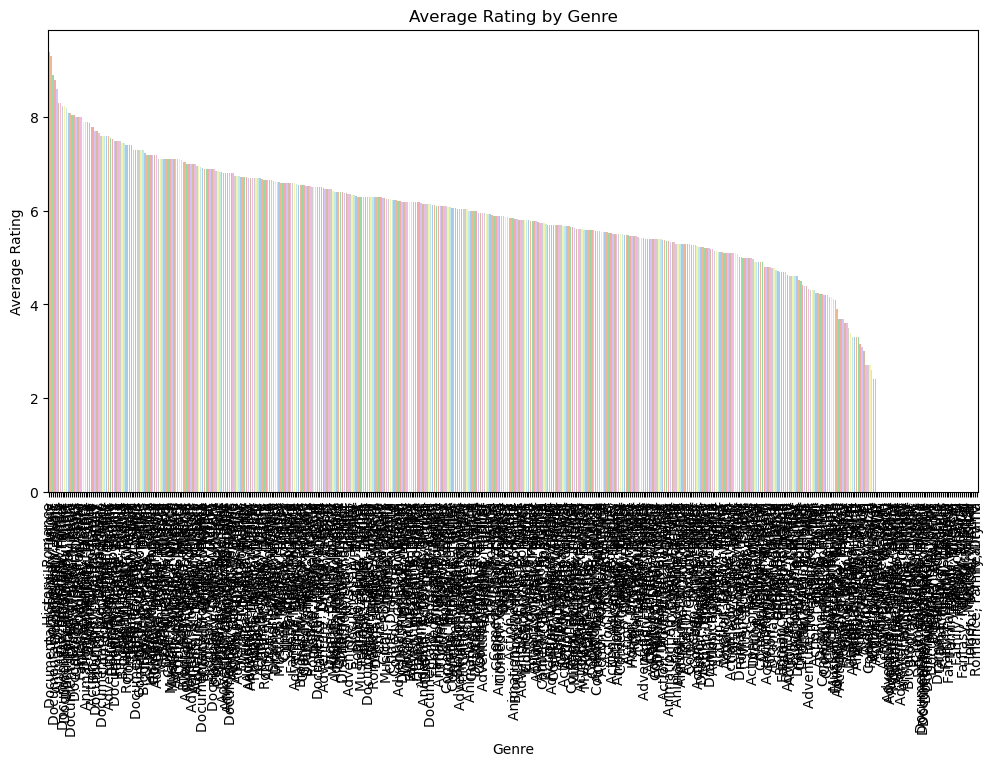

In [137]:
plt.figure(figsize=(12,6))
sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='pastel')
plt.xticks(rotation=90)
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.show()


#  Step 6: Director-wise Average Rating

In [139]:
# Step 6: Director-wise Average Rating
director_rating = df_movie.groupby('Director')['Rating'].mean().sort_values(ascending=False)
print(director_rating.head(10))  # Sirf top 10 directors dekhne ke liye

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Bobby Kumar         9.6
Arvind Pratap       9.4
Ashish Dubey        9.4
Suhrud Godbole      9.4
Munni Pankaj        9.4
Venkatesh Bk        9.3
Vishwa Bhanu        9.3
Raghav Jairath      9.3
Name: Rating, dtype: float64


# Plot director-wise rating (top 10)

C:\Users\KAMALESH KUMAR\AppData\Local\Temp\ipykernel_26092\3601462469.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='muted')


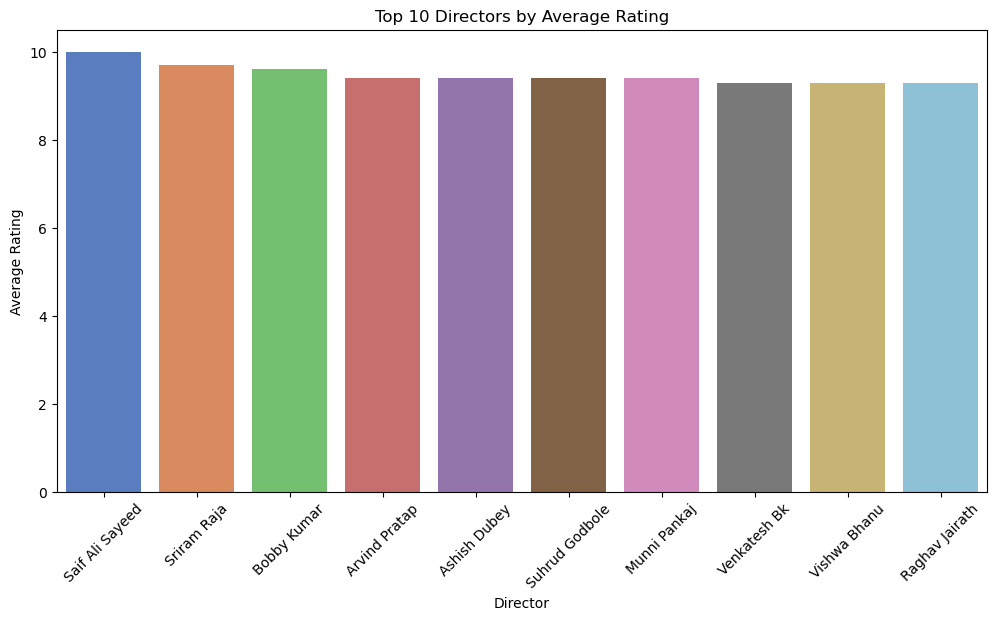

In [140]:
# Plot director-wise rating (top 10)
top_10_directors = director_rating.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='muted')
plt.xticks(rotation=45)
plt.title('Top 10 Directors by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Director')
plt.show()

# Step 7: Actor-wise Average Rating
# NOTE: Actors usually ek se jyada hote hain ek movie me (comma separated), thoda handle karna padega

# Split 'Actors' column

In [146]:
df_movie['Actors_list'] = df_movie['Actor 1'].str.split(', ')

# # Expand the actors into multiple rows

In [147]:

df_exploded = df_movie.explode('Actors_list')


# Now group by actor

#  Top 20 actors

In [149]:

actor_rating = df_exploded.groupby('Actors_list')['Rating'].mean().sort_values(ascending=False)
print(actor_rating.head(20))  


Actors_list
Ahaan Jha            10.0
Raj Banerjee          9.7
Ishan Jacob           9.4
Nishi Neha Mishra     9.4
Vaibhav Khisti        9.4
Dharmendra Ahir       9.4
Leila Advani          9.3
Kunj Anand            9.3
Amrit                 9.3
Tejaswini Manogna     9.3
Vijay Mahar           9.3
Prashant Chaubey      9.3
Vishwa Bhanu          9.3
Subramanian Swamy     9.2
Bobby Darling         9.2
Aarti S. Bagdi        9.2
Karanveer             9.1
P.P. Bajaj            9.1
Kuldeep Ruhil         9.1
Suriya                9.1
Name: Rating, dtype: float64


# Plot actor-wise rating (top 10)

C:\Users\KAMALESH KUMAR\AppData\Local\Temp\ipykernel_26092\920596389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_actors.index, y=top_10_actors.values, palette='coolwarm')


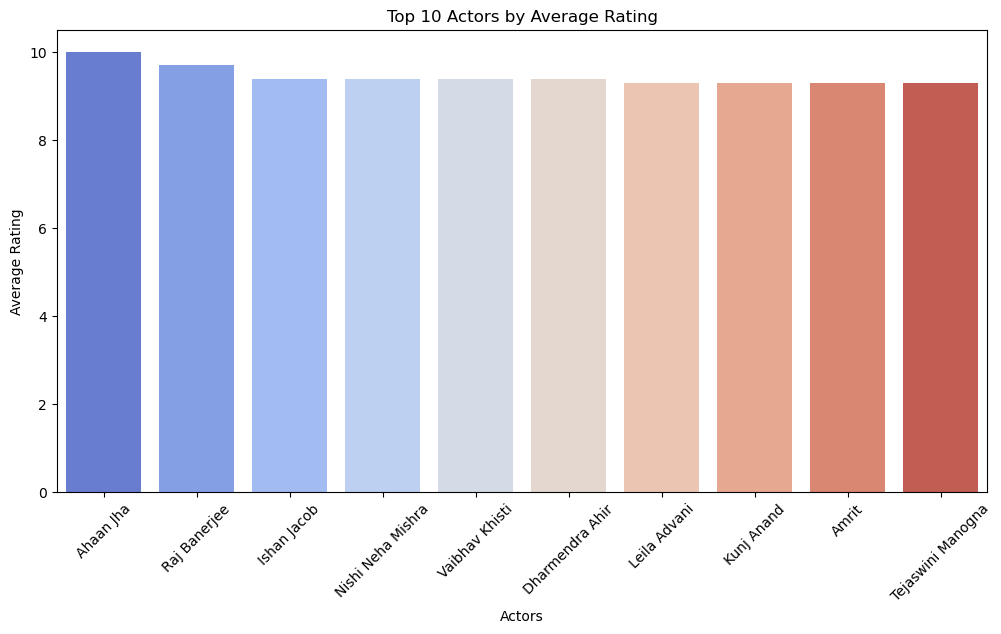

In [150]:

top_10_actors = actor_rating.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_actors.index, y=top_10_actors.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Actors by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Actors')
plt.show()
